Relevant Information:

    This file concerns credit card applications.  All attribute names
    and values have been changed to meaningless symbols to protect
    confidentiality of the data.

## Dataset description

First things first we will take a look at the different variables presented to us, as well as their data type

Number of Attributes: 15 + class attribute

Attribute Information:

    A1:	b, a.
    A2:	continuous.
    A3:	continuous.
    A4:	u, y, l, t.
    A5:	g, p, gg.
    A6:	c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
    A7:	v, h, bb, j, n, z, dd, ff, o.
    A8:	continuous.
    A9:	t, f.
    A10:	t, f.
    A11:	continuous.
    A12:	t, f.
    A13:	g, p, s.
    A14:	continuous.
    A15:	continuous.
    A16: +,-         (class attribute)




Using this information we can identify our target variable (**A16**). We can also see that it is a discrete variable, therefore we are facing a **Classification Problem**. It only has two possible values, "+" or "-".

Missing Attribute Values:
    37 cases (5%) have one or more missing values.  The missing
    values from particular attributes are:

    A1:  12
    A2:  12
    A4:   6
    A5:   6
    A6:   9
    A7:   9
    A14: 13

We have around 5% of missing values, we will have to deal with those shortly. Now we'll take a look at the data.

In [196]:
import pandas as pd
import numpy as np

In [197]:
df = pd.read_csv("data/crx3.data")
columns = ["A1", "A2", "A3", "A4", "A5", "A6", "A7", "A8",
           "A9", "A10", "A11", "A12", "A13", "A14", "A15", "A16"]
df.columns = columns
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,360.0,0,+


First glance at our data, we can see that numerical variables differ significantly in scale.

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      677 non-null    object 
 1   A2      677 non-null    float64
 2   A3      689 non-null    float64
 3   A4      683 non-null    object 
 4   A5      683 non-null    object 
 5   A6      680 non-null    object 
 6   A7      680 non-null    object 
 7   A8      689 non-null    float64
 8   A9      689 non-null    object 
 9   A10     689 non-null    object 
 10  A11     689 non-null    int64  
 11  A12     689 non-null    object 
 12  A13     689 non-null    object 
 13  A14     676 non-null    float64
 14  A15     689 non-null    int64  
 15  A16     689 non-null    object 
dtypes: float64(4), int64(2), object(10)
memory usage: 86.2+ KB


We can check which columns presented the most amount of missing values.

In [199]:
df.describe()

,A2,A3,A8,A11,A14,A15
count,677.000000,689.000000,689.000000,689.000000,676.000000,689.000000
mean,31.569261,4.765631,2.224819,2.402032,183.988166,1018.862119
std,11.966670,4.978470,3.348739,4.866180,173.934087,5213.743149
min,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.580000,1.000000,0.165000,0.000000,74.500000,0.000000
50%,28.420000,2.750000,1.000000,0.000000,160.000000,5.000000
75%,38.250000,7.250000,2.625000,3.000000,277.000000,396.000000
max,80.250000,28.000000,28.500000,67.000000,2000.000000,100000.000000


Using describe we can confirm that these numerical variables have notable differences in scale, that is something we'll have to keep in mind.

## Data Visualization

In [200]:
# Definition of a function to visualize correlation between variables
import seaborn as sn
import matplotlib.pyplot as plt


def plot_correlation(df):
    corr_matrix = df.corr()
    heat_map = sn.heatmap(corr_matrix, annot=False)
    plt.show(heat_map)

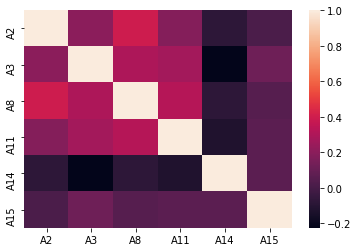

In [201]:
plot_correlation(df)

Between this particular variables there seem to be no clear correlation that could indicate we should delete any of the variables.

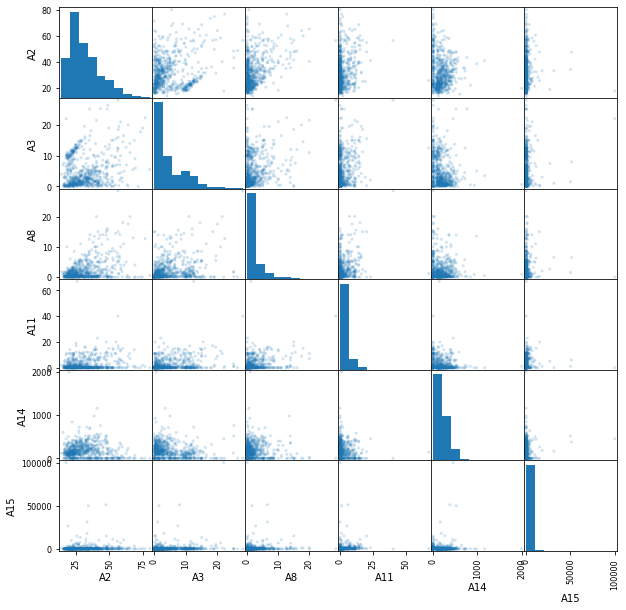

In [202]:
pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(10, 10));

Using this scatter matrix we can see some outlier values mostly on **A15**. The problem is that we cannot know if those are error or real values. If we were to see that the precision of our model is not as high as we expected, we could always come back and try removing them.

## Data Processing
Our first step now will be separating our data into train set and test set.

In [203]:
from sklearn.model_selection import train_test_split

X = df.drop(axis=1, columns='A16')

# replacing target variable possible values with 1 and 0
y = df['A16'].replace(to_replace=["+", "-"], value=[1, 0])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=123)

In [204]:
# Categorical variable names
cat_var = X_train.select_dtypes(include=['object', 'bool']).columns
# Numerical variable names
num_var = X_train.select_dtypes(np.number).columns

### Data Cleaning
Now we will impute missing values

In [205]:
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.compose import ColumnTransformer

For this project we used a KNN Imputer for numerical variables and a most frequent imputer for categorical variables

In [206]:
# Creating both numerical and categorical imputer
t1 = ('num_imputer', KNNImputer(n_neighbors=5), num_var)
t2 = ('cat_imputer', SimpleImputer(strategy='most_frequent'),
      cat_var)

column_transformer_cleaning = ColumnTransformer(
    transformers=[t1, t2], remainder='passthrough')

column_transformer_cleaning.fit(X_train)

Train_transformed = column_transformer_cleaning.transform(X_train)
Test_transformed = column_transformer_cleaning.transform(X_test)

# Here we update the order in wich variables are located in the dataframe, given that after transforming, we will have all
# numerical variables first, followed by all the categorical variables.
var_order = num_var.tolist() + cat_var.tolist()

# And finally we recreate the Data Frames
X_train_clean = pd.DataFrame(Train_transformed, columns=var_order)
X_test_clean = pd.DataFrame(Test_transformed, columns=var_order)

### Normalizing and encoding data
Next step is to normalize numerical data and encode categorical variables (One Hot Encoding or creating "dummy" variables)

In [207]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [208]:
# We obtain the diferent values in all categorical variables
dif_values = [df[column].dropna().unique() for column in cat_var]

In [209]:
# Now we create the transformers
t_norm = ("normalizer", MinMaxScaler(feature_range=(0, 1)), num_var)
t_nominal = ("onehot", OneHotEncoder(
    sparse=False, categories=dif_values), cat_var)             
# As the dataset isn't huge, we will set sparse=false

In [210]:
column_transformer_norm_enc = ColumnTransformer(transformers=[t_norm, t_nominal],
                                                remainder='passthrough')

column_transformer_norm_enc.fit(X_train_clean);

In [211]:
X_train_transformed = column_transformer_norm_enc.transform(X_train_clean)
X_test_transformed = column_transformer_norm_enc.transform(X_test_clean)

And with this transformations, we end our data preprocessing

## Model Selection
We all know learning from any test set is a huge mistake that will compromise the precision of our estimations of performance. That is why we will separate even further our train set into validation train and validation test sets.

In [212]:
X_val_train, X_val_test, y_val_train, y_val_test = train_test_split(
    X_train_transformed, y_train, test_size=0.20, random_state=123)

As our performance metrics, we will use accuracy

In [213]:
from sklearn.metrics import accuracy_score

from sklearn.model_selection import validation_curve
from sklearn.pipeline import make_pipeline
from sklearn.metrics import make_scorer

Now it begins the process of training different models to see which one performs the best and with what hyperparameters. For this project, we selected **K-Nearest Neighbors**, **Decision Tree Classifier** and **Logistic Regression**.

In [214]:
from sklearn.model_selection import validation_curve
from sklearn.pipeline import make_pipeline
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report

### Decision Tree Classifier

In [215]:
from sklearn import tree

acc_scorer = make_scorer(accuracy_score, greater_is_better=True)
pipe_tree = make_pipeline(tree.DecisionTreeClassifier(random_state=1))

depths = np.arange(1, 31)
num_leafs = [1, 5, 10, 20, 50, 100]

param_grid_tree = [{'decisiontreeclassifier__max_depth': depths,
                    'decisiontreeclassifier__min_samples_leaf': num_leafs}]

In [216]:
from sklearn.model_selection import GridSearchCV

gs_tree = GridSearchCV(estimator=pipe_tree,
                       param_grid=param_grid_tree, scoring='accuracy', cv=10)
best_tree = gs_tree.fit(X_train_transformed, y_train)

In [217]:
print(classification_report(
    best_tree.best_estimator_.predict(X_train_transformed), y_train))
print(best_tree.best_params_)
print(best_tree.best_score_)

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       289
           1       0.92      0.82      0.87       262

    accuracy                           0.88       551
   macro avg       0.88      0.88      0.88       551
weighted avg       0.88      0.88      0.88       551

{'decisiontreeclassifier__max_depth': 4, 'decisiontreeclassifier__min_samples_leaf': 20}
0.8674350649350648


### K-Nearest Neighbors

In [218]:
from sklearn import neighbors

acc_scorer = make_scorer(accuracy_score, greater_is_better=True)
pipe_knn = make_pipeline(neighbors.KNeighborsClassifier())

n_neighbors = [number for number in np.arange(1, 32) if number % 2 == 1]
weights = ['uniform', 'distance']
metrics = ['euclidean', 'manhattan']

param_grid_knn = [{'kneighborsclassifier__n_neighbors': n_neighbors, 'kneighborsclassifier__weights': weights,
                   'kneighborsclassifier__metric': metrics}]

In [219]:
gs_knn = GridSearchCV(estimator=pipe_knn,
                      param_grid=param_grid_knn, scoring='accuracy', cv=10)
best_knn = gs_knn.fit(X_train_transformed, y_train)

In [220]:
print(classification_report(
    best_knn.best_estimator_.predict(X_train_transformed), y_train))
print(best_knn.best_params_)
print(best_knn.best_score_)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       315
           1       1.00      1.00      1.00       236

    accuracy                           1.00       551
   macro avg       1.00      1.00      1.00       551
weighted avg       1.00      1.00      1.00       551

{'kneighborsclassifier__metric': 'manhattan', 'kneighborsclassifier__n_neighbors': 27, 'kneighborsclassifier__weights': 'distance'}
0.883733766233766


### Logistic Regression

In [221]:
from sklearn import linear_model

import warnings
warnings.filterwarnings('ignore')

pipe_lr = make_pipeline(linear_model.LogisticRegression())

penalty = ['l1', 'l2']
c = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

param_grid_lr = {'logisticregression__penalty': penalty,
                 'logisticregression__C': c}

gs_lr = GridSearchCV(
    pipe_lr, param_grid=param_grid_lr, scoring='accuracy')
gs_lr.fit(X_train_transformed, y_train);

In [222]:
print(classification_report(gs_lr.best_estimator_.predict(X_train_transformed), y_train))
print(gs_lr.best_params_)
print(gs_lr.best_score_)

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       298
           1       0.91      0.85      0.88       253

    accuracy                           0.89       551
   macro avg       0.90      0.89      0.89       551
weighted avg       0.89      0.89      0.89       551

{'logisticregression__C': 1, 'logisticregression__penalty': 'l2'}
0.8783456183456184


## Model Training
We identified (it was close, mostly because of our data preprocessing) that **K-Nearest Neighbors** was the winner. Now it's time to train that model with all of our train data (keeping the best model parameters) to obtain the *down to earth* performance of our model.

In [224]:
model = neighbors.KNeighborsClassifier(metric='manhattan',n_neighbors=27,weights='distance')
model.fit(X_train_transformed,y_train)
y_pred = model.predict(X_test_transformed)
acc = accuracy_score(y_test,y_pred)
print('The accuracy of our model is :',round(acc,4))

The accuracy of our model is : 0.8261


## Conclusion

The tool we developed to help determining which clients can access a bank loan has an estimated accuracy of 83%